# MACHINE FAILURE PREDICTION WITH PREDICTIVE MAINTENANCE  MACHINE LEARNING

Machine Predictive Maintenance Classification is a very useful application of machine learning. Unfortunately, the real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish. Hence, in this work, synthetic dataset that reflects real predictive maintenance encountered in the industry was used to predict machine failure.

The dataset consists of 10 000 records stored as rows with 14 features in columns. Some of the columns are briefly described below.

 - UID: unique identifier ranging from 1 to 10000
 - productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality    variants and a variant-specific serial number
 - air temperature: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
 - process temperature: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
 - rotational speed: calculated from powepower of 2860 W, overlaid with a normally distributed noise
 - torque: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
 - tool wear: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
 - 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

In [160]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [161]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [162]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [163]:
df=pd.read_csv("predictive_maintenance.csv")
df = df.drop(["UDI","Product ID"],axis=1)
df.sample(6).style.set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    })

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8793,L,297.400000,308.500000,1782,25.900000,54,0,No Failure
5067,M,304.200000,313.200000,1396,50.500000,11,0,No Failure
9545,L,299.600000,311.000000,1430,38.300000,124,0,No Failure
5358,H,303.300000,312.600000,1827,24.200000,132,0,No Failure
9024,L,297.400000,308.300000,1366,45.500000,11,0,No Failure
2778,L,300.000000,309.400000,1308,50.200000,32,0,No Failure


In [164]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [165]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
253,L,25.85,36.05,1357,48.2,7,0,No Failure,10.2
4188,M,30.15,38.65,1611,31.8,169,0,No Failure,8.5
8065,M,28.35,39.75,1670,26.3,89,0,No Failure,11.4
1688,L,25.75,35.25,1606,35.5,14,0,No Failure,9.5
2839,M,28.25,37.25,1362,42.1,182,0,No Failure,9.0


In [166]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [167]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [168]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


## Explorfatory Data Analysis

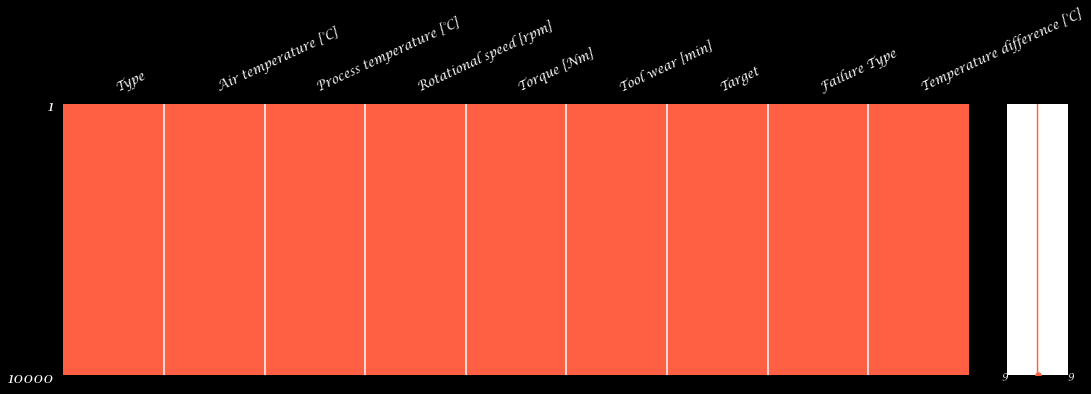

In [169]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

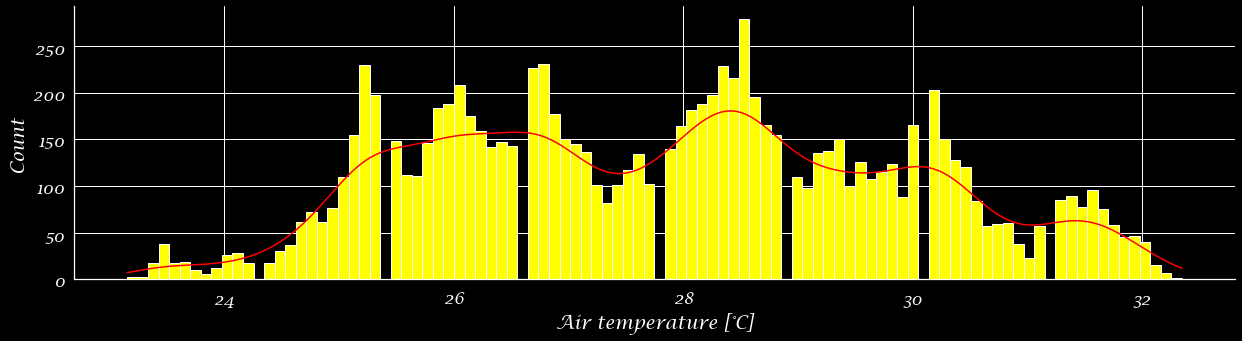

In [170]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

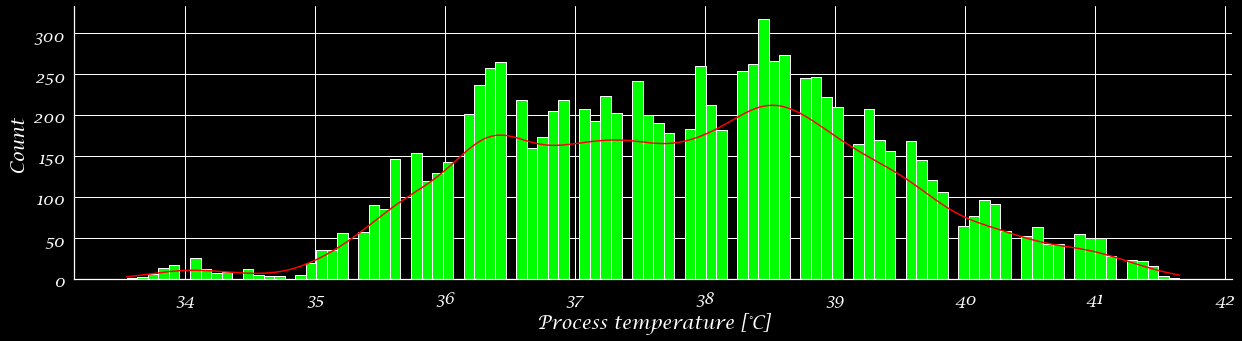

In [171]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

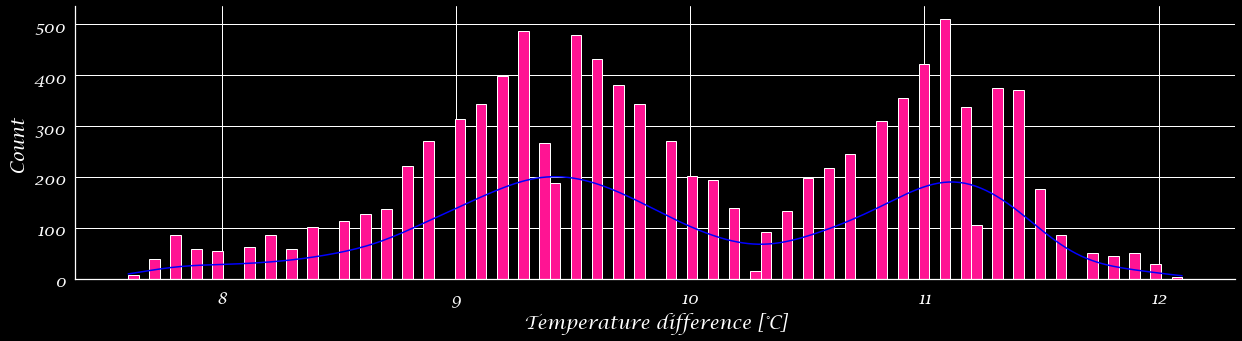

In [172]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

In [173]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


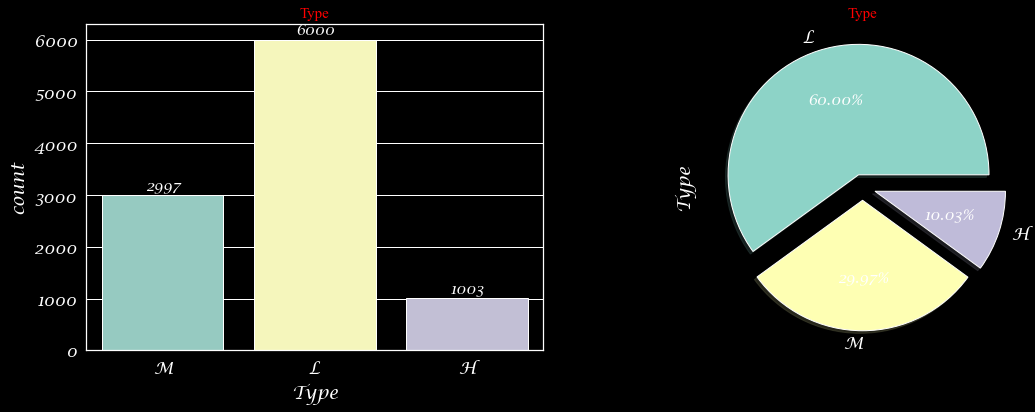

In [174]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

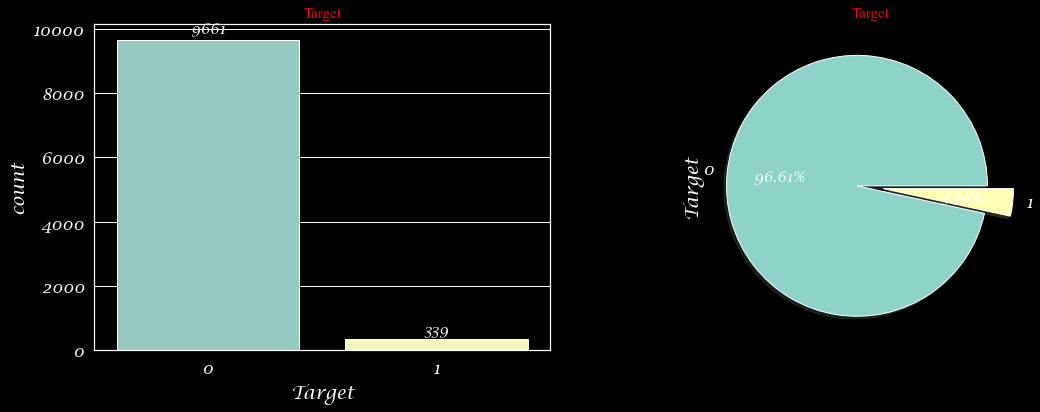

In [175]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

In [176]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


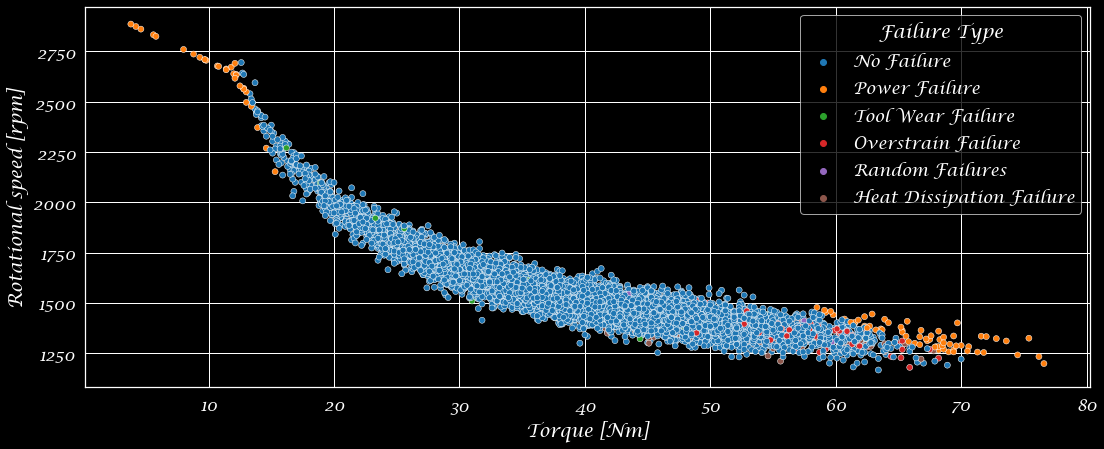

In [177]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

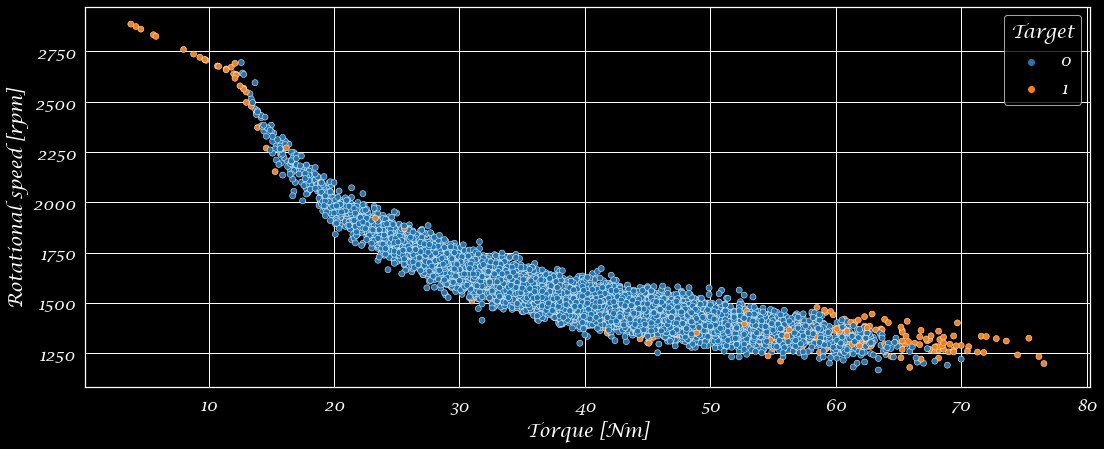

In [178]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

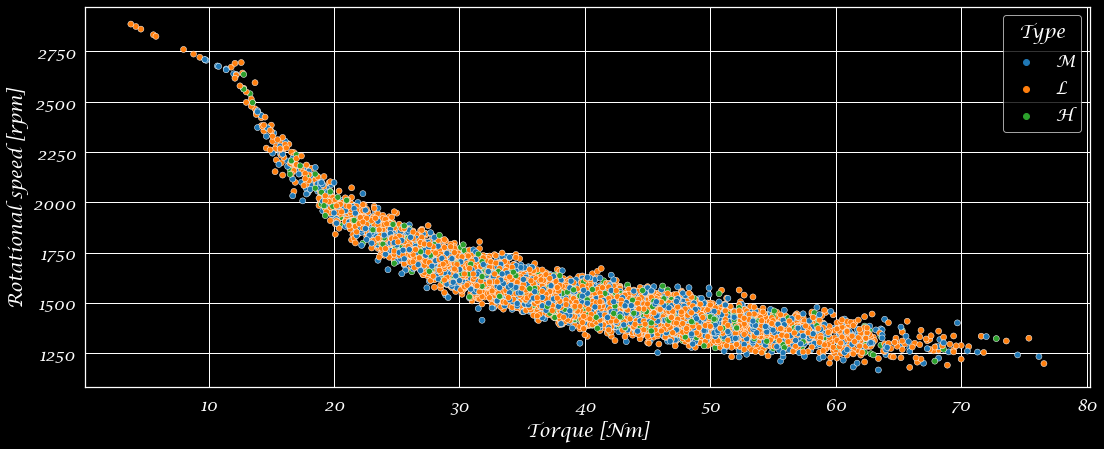

In [179]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [180]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


In [181]:
#plt.figure(figsize = (15, 6))
#plt.grid()
#sns.swarmplot(df["Torque [Nm]"], df["Failure Type"], hue = df["Failure Type"]);

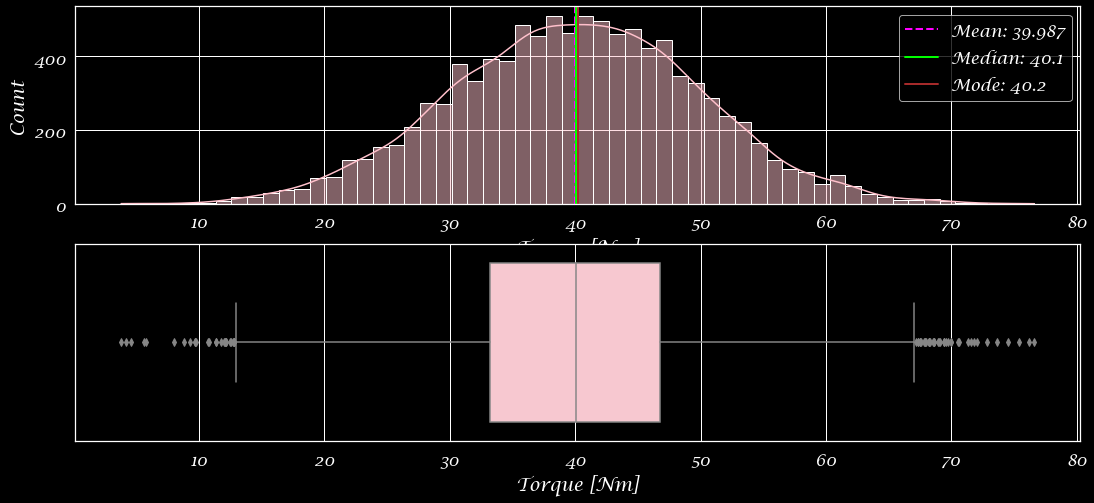

In [182]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

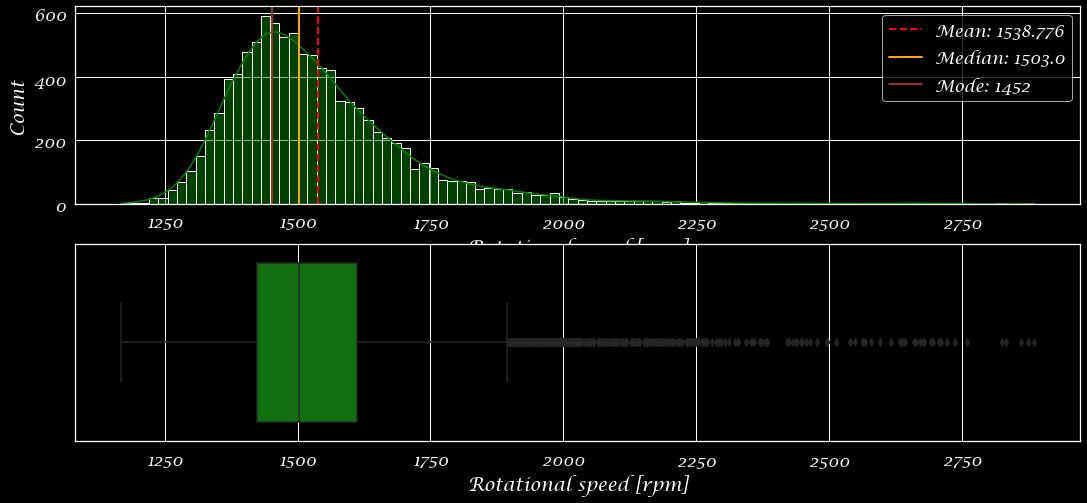

In [183]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

In [184]:
# sns.pairplot(df,hue = "Failure Type");

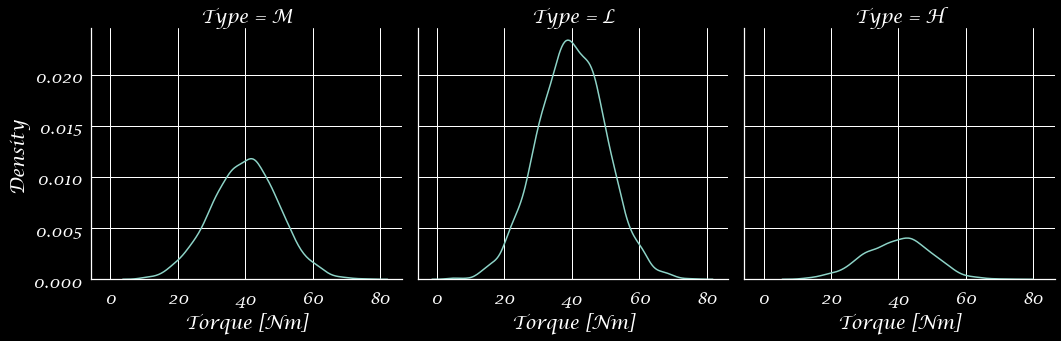

In [185]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

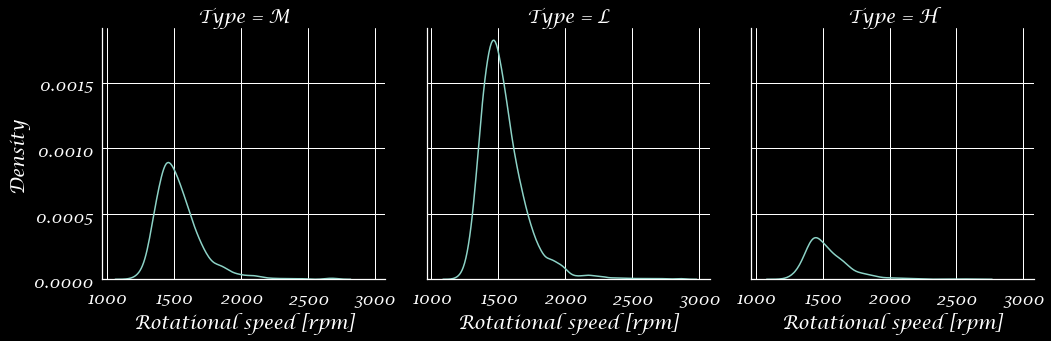

In [186]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

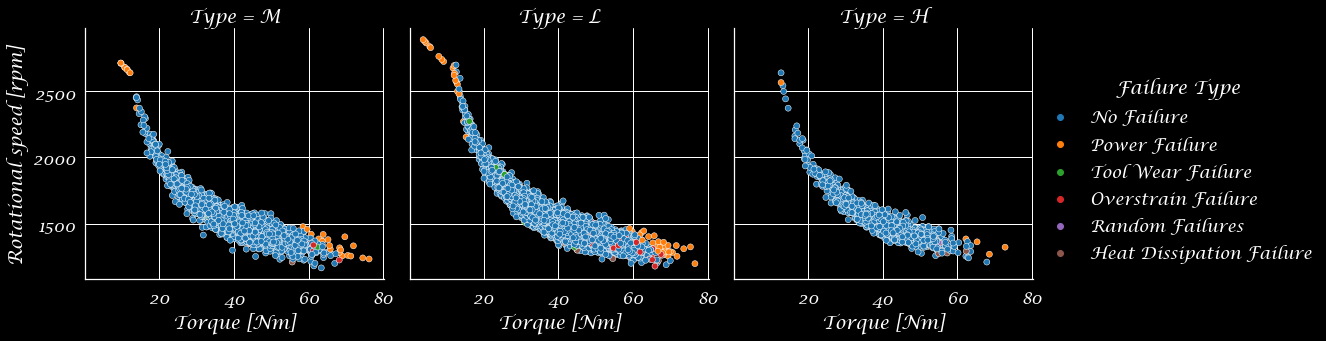

In [187]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

## Feature Selection

In [188]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


In [189]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [190]:
X = df.drop(columns=["Failure Type","Target"] , axis=1)
y = df["Failure Type"]
X.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,10.5
1,2,26.05,36.55,1408,46.3,3,10.5
2,2,25.95,36.35,1498,49.4,5,10.4
3,2,26.05,36.45,1433,39.5,7,10.4
4,2,26.05,36.55,1408,40.0,9,10.5


In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

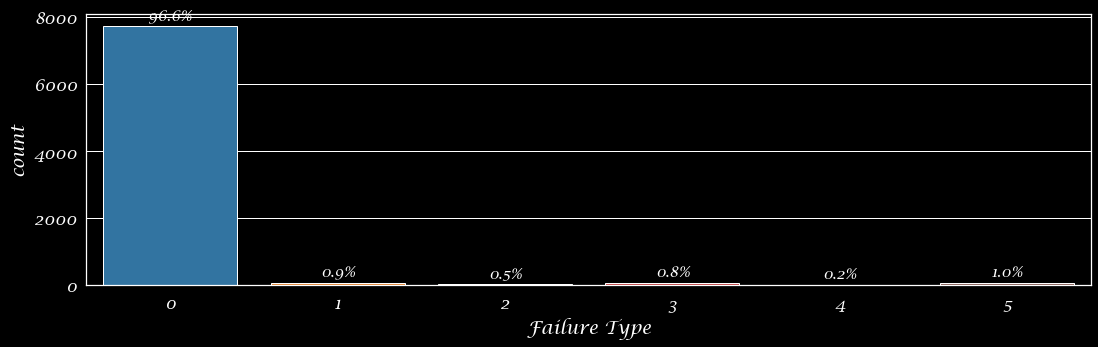

In [192]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

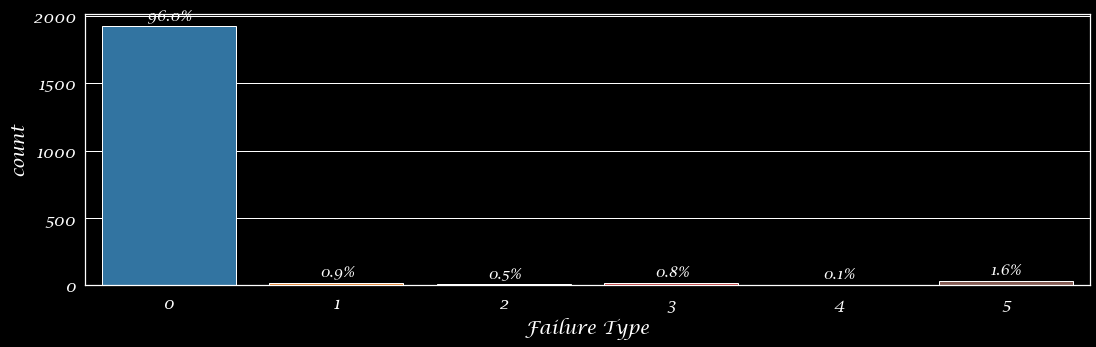

In [193]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

## LogisticRegression

Training Accuracy    : 96.72 %
Model Accuracy Score : 96.1 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.57      0.25      0.35        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.26      0.21      0.22      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


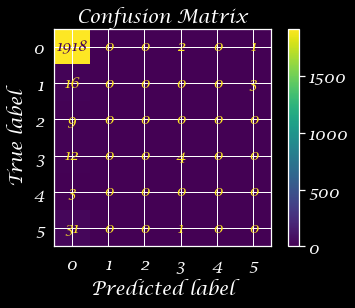

In [194]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

## Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1921
           1       0.77      0.89      0.83        19
           2       0.00      0.00      0.00         9
           3       0.87      0.81      0.84        16
           4       0.00      0.00      0.00         3
           5       0.96      0.84      0.90        32

    accuracy                           0.98      2000
   macro avg       0.60      0.59      0.59      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


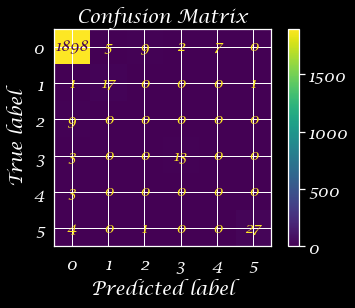

In [195]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

## Random Forest Classifier 

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1921
           1       0.89      0.89      0.89        19
           2       0.00      0.00      0.00         9
           3       1.00      0.69      0.81        16
           4       0.00      0.00      0.00         3
           5       0.96      0.78      0.86        32

    accuracy                           0.99      2000
   macro avg       0.64      0.56      0.59      2000
weighted avg       0.98      0.99      0.98      2000

--------------------------------------------------------


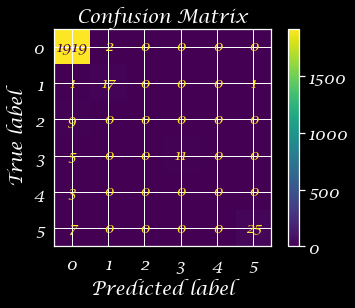

In [196]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');


## SVM 

Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


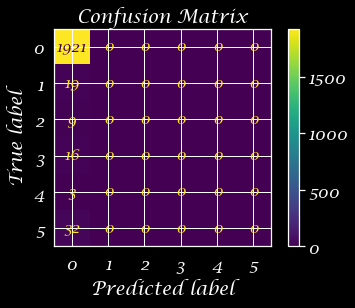

In [197]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

## Model Buiding

In [198]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [199]:
pd.set_option('display.precision',2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
Decision Tree,100.000000,98.600000
Random Forest,100.000000,97.750000
Support Vector Machines,96.720000,96.100000
Logistic Regression,96.640000,96.050000


## Result

In [200]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[0 0 0 ... 0 0 0]


In [201]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
4615,0,0
407,0,0
2427,0,0
3836,0,0
5669,0,0


## Binary Classification with Data Balanced with Oversampling

In [202]:
X2 = df.drop(columns=["Failure Type","Target"] , axis=1)
y2 = df["Target"]
X2.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,10.5
1,2,26.05,36.55,1408,46.3,3,10.5
2,2,25.95,36.35,1498,49.4,5,10.4
3,2,26.05,36.45,1433,39.5,7,10.4
4,2,26.05,36.55,1408,40.0,9,10.5


In [203]:
#oversampling using the imbalanced-learn python library
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X2, y2)

In [204]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X_over,y_over,test_size=0.2,random_state=21)

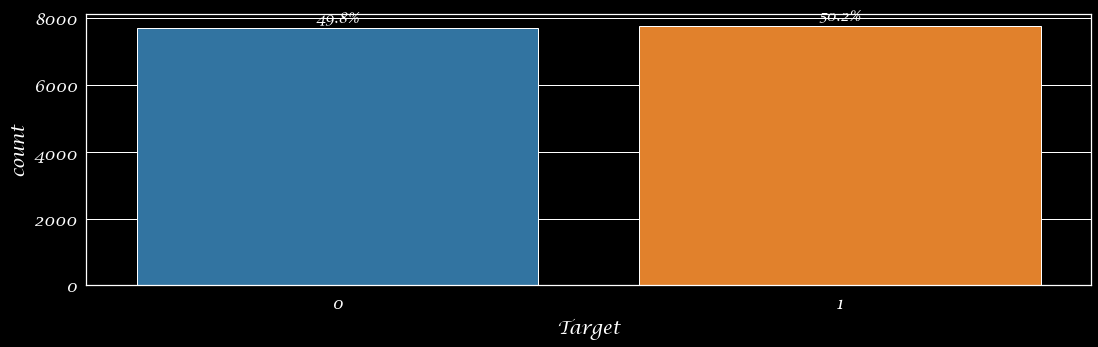

In [205]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y2_train, palette = 'tab10')
t= len(y2_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

## LogisticRegression

Training Accuracy    : 80.65 %
Model Accuracy Score : 80.62 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1959
           1       0.79      0.82      0.81      1906

    accuracy                           0.81      3865
   macro avg       0.81      0.81      0.81      3865
weighted avg       0.81      0.81      0.81      3865

--------------------------------------------------------


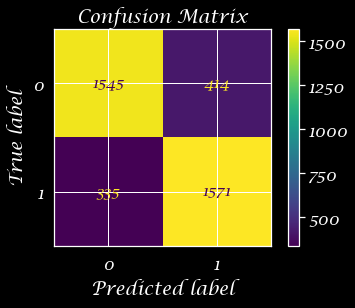

In [206]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)
y_pred_lr = logreg.predict(X2_test)

log_train = round(logreg.score(X2_train, y2_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y2_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y2_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X2_test, y2_test);
plt.title('Confusion Matrix');

## Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.48 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1959
           1       0.99      1.00      0.99      1906

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865

--------------------------------------------------------


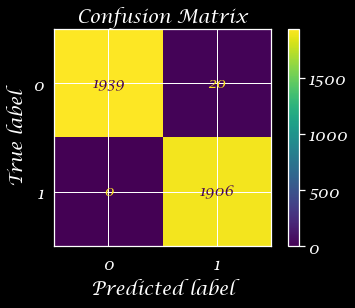

In [207]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X2_train, y2_train)
y_pred_dec = decision.predict(X2_test)

decision_train = round(decision.score(X2_train, y2_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y2_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y2_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X2_test, y2_test);
plt.title('Confusion Matrix');

## Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.69 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1959
           1       0.99      1.00      1.00      1906

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865

--------------------------------------------------------


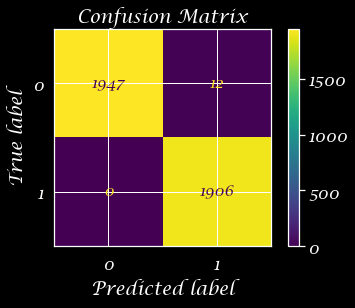

In [208]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X2_train, y2_train)
y_pred_rf = random_forest.predict(X2_test)
random_forest.score(X2_train, y2_train)

random_forest_train = round(random_forest.score(X2_train, y2_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y2_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y2_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X2_test, y2_test);
plt.title('Confusion Matrix');

## SVM Classifier

Training Accuracy    : 82.33 %
Model Accuracy Score : 82.98 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1959
           1       0.80      0.86      0.83      1906

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865

--------------------------------------------------------


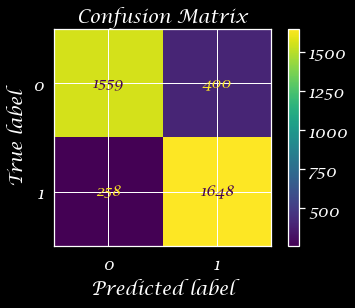

In [209]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X2_train, y2_train)
y_pred_svc = svc.predict(X2_test)

svc_train = round(svc.score(X2_train, y2_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y2_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y2_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X2_test, y2_test);
plt.title('Confusion Matrix');

# Model Building

In [210]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [211]:
pd.set_option('display.precision',2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
Decision Tree,100.000000,99.690000
Random Forest,100.000000,99.480000
Logistic Regression,82.330000,82.980000
Support Vector Machines,80.650000,80.620000
